<center> <h1> Testing the utils for the project</h1>

<b>Autor:</b> Edwin Rueda <br>
<b>email:</b> ejrueda95g@gmail.com <br>
<b>github:</b> https://github.com/ejrueda <br>
<b>website:</b> http://edwinrueda.com/

In [14]:
import utils.EdwinRueda_utils as erutils
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("../data/all_counts_9_norm_rpkm_log2_preprocessed.csv",
                  index_col=0)
r_g = open("../data/reference_genes.txt").read().splitlines()
r_g.remove("idnT")
X_train = data.loc[r_g]
X_train.head()

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
cysG,5.903687,5.879490,5.873191,5.735536,6.016590,6.328393,6.315338,6.504277,6.577601
hcaT,5.692781,5.733848,5.686571,5.925712,6.290692,6.131968,6.113390,5.891730,5.822536
rrsA,10.498560,10.775182,11.515848,11.819169,11.745607,11.033925,10.521316,8.685239,10.590185
ihfB,11.625723,11.784312,12.694811,13.119308,13.096534,12.574847,12.140031,10.126885,11.298441
ssrA,12.889916,13.026561,13.839784,14.807551,14.601034,13.858224,14.509441,12.713618,13.816964


#### Data scaling with the utils

In [3]:
scaler = erutils.scaler(xmin=-1, xmax=1)
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_train_scaler.head()

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
cysG,-0.969147,-0.978963,-0.973373,-1.000000,-1.000000,-0.970143,-0.970659,-0.911181,-0.890876
hcaT,-1.000000,-1.000000,-1.000000,-0.972570,-0.959573,-1.000000,-1.000000,-1.000000,-1.000000
rrsA,-0.296977,-0.271812,-0.168266,-0.122535,-0.155035,-0.254901,-0.359582,-0.594943,-0.310966
ihfB,-0.132088,-0.126050,-0.000049,0.064988,0.044212,-0.020681,-0.124403,-0.385905,-0.208607
ssrA,0.052847,0.053385,0.163319,0.308490,0.266109,0.174393,0.219843,-0.010831,0.155377


#### Creating the Discriminator and Generator networks

In [4]:
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.models import Sequential 

noise_input = 50 #size of the noise vector
## Generator Network
G = Sequential()
G.add(Dense(noise_input, input_shape=(noise_input,)))
G.add(Dense(32))
G.add(Dropout(.1))
G.add(Dense(64))
G.add(Dropout(.15))
G.add(Dense(32))
G.add(Dense(9, activation="tanh"))

## Discriminator Network
D = Sequential()
D.add(Dense(9, input_shape=(9,)))
D.add(Dense(32))
D.add(LeakyReLU(alpha=.2))
D.add(Dropout(.1))
D.add(Dense(32))
D.add(Dense(1, activation="sigmoid"))

In [5]:
noise_vector = tf.random_normal_initializer(0.,1.)([1, noise_input])
print("shape of the noise vector:",noise_vector.shape)
print("---------------------------------------")
synthetic_gene = G(noise_vector)
print("synthetic gene:", synthetic_gene.numpy())
print("---------------------------------------")
print("Probability of the D network:", D(synthetic_gene).numpy())
print("---------------------------------------")
print("loss:", erutils.gan_utils().binary_cross_entropy(D(synthetic_gene).numpy(), 0.).numpy())

shape of the noise vector: (1, 50)
---------------------------------------
synthetic gene: [[ 0.34229446 -0.98126322 -0.79493473 -0.12545272 -0.22828511 -0.79874034
   0.18898272 -0.85632504  0.92747418]]
---------------------------------------
Probability of the D network: [[0.56151571]]
---------------------------------------
loss: 0.8244313045672345


#### Training the GAN network

In [6]:
batch_size = 20
epochs = 1700
optimizerG = tf.optimizers.SGD(lr=0.00015, momentum=0.92, decay=0.00015/epochs)
optimizerD = tf.optimizers.SGD(lr=0.0011, momentum=0.9, decay=0.0011/epochs)

gan_utilities = erutils.gan_utils()
gloss, dloss = gan_utilities.train(X_train_scaler, G, D, noise_input, epochs, batch_size, optimizerG, optimizerD)

epochs[0:1700] :: G_loss[0.569518] :: D_loss[0.785771] :: time:1.219358[s]
epochs[1:1700] :: G_loss[0.625205] :: D_loss[0.750755] :: time:0.012389[s]
epochs[2:1700] :: G_loss[0.610644] :: D_loss[0.744298] :: time:0.011481[s]
epochs[3:1700] :: G_loss[0.613605] :: D_loss[0.750222] :: time:0.014248[s]
epochs[4:1700] :: G_loss[0.637100] :: D_loss[0.747737] :: time:0.019664[s]
epochs[5:1700] :: G_loss[0.634821] :: D_loss[0.741500] :: time:0.024576[s]
epochs[6:1700] :: G_loss[0.601967] :: D_loss[0.762205] :: time:0.017866[s]
epochs[7:1700] :: G_loss[0.686846] :: D_loss[0.702664] :: time:0.019239[s]
epochs[8:1700] :: G_loss[0.647564] :: D_loss[0.729255] :: time:0.019871[s]
epochs[9:1700] :: G_loss[0.688563] :: D_loss[0.700958] :: time:0.027646[s]
epochs[10:1700] :: G_loss[0.662980] :: D_loss[0.705791] :: time:0.017746[s]
epochs[11:1700] :: G_loss[0.699684] :: D_loss[0.690299] :: time:0.026697[s]
epochs[12:1700] :: G_loss[0.712788] :: D_loss[0.688841] :: time:0.021665[s]
epochs[13:1700] :: G_l

epochs[109:1700] :: G_loss[0.812698] :: D_loss[0.612798] :: time:0.015082[s]
epochs[110:1700] :: G_loss[0.717756] :: D_loss[0.663777] :: time:0.016341[s]
epochs[111:1700] :: G_loss[0.707005] :: D_loss[0.668760] :: time:0.017734[s]
epochs[112:1700] :: G_loss[0.805521] :: D_loss[0.614153] :: time:0.012936[s]
epochs[113:1700] :: G_loss[0.821046] :: D_loss[0.611178] :: time:0.011235[s]
epochs[114:1700] :: G_loss[0.937853] :: D_loss[0.579049] :: time:0.010859[s]
epochs[115:1700] :: G_loss[0.769733] :: D_loss[0.632444] :: time:0.010944[s]
epochs[116:1700] :: G_loss[0.882936] :: D_loss[0.591073] :: time:0.010756[s]
epochs[117:1700] :: G_loss[0.869950] :: D_loss[0.612429] :: time:0.010795[s]
epochs[118:1700] :: G_loss[0.815417] :: D_loss[0.613154] :: time:0.011984[s]
epochs[119:1700] :: G_loss[0.740939] :: D_loss[0.646312] :: time:0.011463[s]
epochs[120:1700] :: G_loss[0.756930] :: D_loss[0.641650] :: time:0.011105[s]
epochs[121:1700] :: G_loss[0.771492] :: D_loss[0.629188] :: time:0.011609[s]

epochs[228:1700] :: G_loss[0.871958] :: D_loss[0.576632] :: time:0.012100[s]
epochs[229:1700] :: G_loss[0.898530] :: D_loss[0.580370] :: time:0.014288[s]
epochs[230:1700] :: G_loss[0.960393] :: D_loss[0.550482] :: time:0.013565[s]
epochs[231:1700] :: G_loss[0.810272] :: D_loss[0.619886] :: time:0.011791[s]
epochs[232:1700] :: G_loss[0.992755] :: D_loss[0.540047] :: time:0.011750[s]
epochs[233:1700] :: G_loss[0.905281] :: D_loss[0.581677] :: time:0.011269[s]
epochs[234:1700] :: G_loss[0.854226] :: D_loss[0.578411] :: time:0.011691[s]
epochs[235:1700] :: G_loss[0.998340] :: D_loss[0.533042] :: time:0.011589[s]
epochs[236:1700] :: G_loss[0.760831] :: D_loss[0.632293] :: time:0.010633[s]
epochs[237:1700] :: G_loss[0.844150] :: D_loss[0.581526] :: time:0.010886[s]
epochs[238:1700] :: G_loss[0.827937] :: D_loss[0.575104] :: time:0.010883[s]
epochs[239:1700] :: G_loss[0.954050] :: D_loss[0.545927] :: time:0.010680[s]
epochs[240:1700] :: G_loss[0.811927] :: D_loss[0.602200] :: time:0.010618[s]

epochs[350:1700] :: G_loss[0.878744] :: D_loss[0.559396] :: time:0.013297[s]
epochs[351:1700] :: G_loss[0.848826] :: D_loss[0.591963] :: time:0.012919[s]
epochs[352:1700] :: G_loss[0.928362] :: D_loss[0.528579] :: time:0.010888[s]
epochs[353:1700] :: G_loss[0.903255] :: D_loss[0.528484] :: time:0.010768[s]
epochs[354:1700] :: G_loss[0.850812] :: D_loss[0.545615] :: time:0.010946[s]
epochs[355:1700] :: G_loss[0.949219] :: D_loss[0.536886] :: time:0.010683[s]
epochs[356:1700] :: G_loss[0.781693] :: D_loss[0.609974] :: time:0.010770[s]
epochs[357:1700] :: G_loss[0.823166] :: D_loss[0.564088] :: time:0.010984[s]
epochs[358:1700] :: G_loss[0.856871] :: D_loss[0.576832] :: time:0.010907[s]
epochs[359:1700] :: G_loss[0.996702] :: D_loss[0.521419] :: time:0.010901[s]
epochs[360:1700] :: G_loss[0.922604] :: D_loss[0.545642] :: time:0.010710[s]
epochs[361:1700] :: G_loss[0.896480] :: D_loss[0.551153] :: time:0.010834[s]
epochs[362:1700] :: G_loss[0.946051] :: D_loss[0.551702] :: time:0.010732[s]

epochs[464:1700] :: G_loss[0.936060] :: D_loss[0.564079] :: time:0.012667[s]
epochs[465:1700] :: G_loss[0.925273] :: D_loss[0.525557] :: time:0.013695[s]
epochs[466:1700] :: G_loss[0.921991] :: D_loss[0.551102] :: time:0.011316[s]
epochs[467:1700] :: G_loss[0.831587] :: D_loss[0.606161] :: time:0.010839[s]
epochs[468:1700] :: G_loss[0.845401] :: D_loss[0.591227] :: time:0.010936[s]
epochs[469:1700] :: G_loss[0.919388] :: D_loss[0.558206] :: time:0.010695[s]
epochs[470:1700] :: G_loss[0.921301] :: D_loss[0.549338] :: time:0.010764[s]
epochs[471:1700] :: G_loss[0.868314] :: D_loss[0.574800] :: time:0.012048[s]
epochs[472:1700] :: G_loss[1.030955] :: D_loss[0.517504] :: time:0.010899[s]
epochs[473:1700] :: G_loss[0.931767] :: D_loss[0.544377] :: time:0.010800[s]
epochs[474:1700] :: G_loss[0.993518] :: D_loss[0.540768] :: time:0.011690[s]
epochs[475:1700] :: G_loss[0.940453] :: D_loss[0.547165] :: time:0.010818[s]
epochs[476:1700] :: G_loss[0.897369] :: D_loss[0.585756] :: time:0.010781[s]

epochs[575:1700] :: G_loss[0.851867] :: D_loss[0.577661] :: time:0.012638[s]
epochs[576:1700] :: G_loss[0.835271] :: D_loss[0.631195] :: time:0.013068[s]
epochs[577:1700] :: G_loss[0.908061] :: D_loss[0.593921] :: time:0.012683[s]
epochs[578:1700] :: G_loss[0.856532] :: D_loss[0.574924] :: time:0.011157[s]
epochs[579:1700] :: G_loss[0.938246] :: D_loss[0.567123] :: time:0.010904[s]
epochs[580:1700] :: G_loss[0.975403] :: D_loss[0.548541] :: time:0.010718[s]
epochs[581:1700] :: G_loss[0.851130] :: D_loss[0.588816] :: time:0.010821[s]
epochs[582:1700] :: G_loss[0.894765] :: D_loss[0.597894] :: time:0.010728[s]
epochs[583:1700] :: G_loss[0.883135] :: D_loss[0.572717] :: time:0.010875[s]
epochs[584:1700] :: G_loss[0.852266] :: D_loss[0.592506] :: time:0.010817[s]
epochs[585:1700] :: G_loss[0.903015] :: D_loss[0.578671] :: time:0.010890[s]
epochs[586:1700] :: G_loss[1.084803] :: D_loss[0.529933] :: time:0.010842[s]
epochs[587:1700] :: G_loss[0.991359] :: D_loss[0.557661] :: time:0.010604[s]

epochs[686:1700] :: G_loss[0.874653] :: D_loss[0.634119] :: time:0.010793[s]
epochs[687:1700] :: G_loss[0.987692] :: D_loss[0.596660] :: time:0.014604[s]
epochs[688:1700] :: G_loss[0.747337] :: D_loss[0.719929] :: time:0.013082[s]
epochs[689:1700] :: G_loss[1.033528] :: D_loss[0.610396] :: time:0.010955[s]
epochs[690:1700] :: G_loss[0.834177] :: D_loss[0.662012] :: time:0.010950[s]
epochs[691:1700] :: G_loss[0.809248] :: D_loss[0.670357] :: time:0.010702[s]
epochs[692:1700] :: G_loss[0.989023] :: D_loss[0.600865] :: time:0.010731[s]
epochs[693:1700] :: G_loss[0.800844] :: D_loss[0.668333] :: time:0.010665[s]
epochs[694:1700] :: G_loss[0.907615] :: D_loss[0.661673] :: time:0.010768[s]
epochs[695:1700] :: G_loss[0.806639] :: D_loss[0.650543] :: time:0.010752[s]
epochs[696:1700] :: G_loss[0.885637] :: D_loss[0.610091] :: time:0.010712[s]
epochs[697:1700] :: G_loss[0.714497] :: D_loss[0.700991] :: time:0.010688[s]
epochs[698:1700] :: G_loss[0.740106] :: D_loss[0.729006] :: time:0.010841[s]

epochs[794:1700] :: G_loss[0.902749] :: D_loss[0.647142] :: time:0.012323[s]
epochs[795:1700] :: G_loss[0.834122] :: D_loss[0.709466] :: time:0.015124[s]
epochs[796:1700] :: G_loss[0.806490] :: D_loss[0.663084] :: time:0.010793[s]
epochs[797:1700] :: G_loss[0.785581] :: D_loss[0.683002] :: time:0.011153[s]
epochs[798:1700] :: G_loss[0.838643] :: D_loss[0.667439] :: time:0.010772[s]
epochs[799:1700] :: G_loss[0.909816] :: D_loss[0.685852] :: time:0.010917[s]
epochs[800:1700] :: G_loss[0.813888] :: D_loss[0.673522] :: time:0.010928[s]
epochs[801:1700] :: G_loss[0.938074] :: D_loss[0.618363] :: time:0.010855[s]
epochs[802:1700] :: G_loss[0.801587] :: D_loss[0.688370] :: time:0.010678[s]
epochs[803:1700] :: G_loss[0.895201] :: D_loss[0.629404] :: time:0.010808[s]
epochs[804:1700] :: G_loss[0.753156] :: D_loss[0.712418] :: time:0.010826[s]
epochs[805:1700] :: G_loss[0.793864] :: D_loss[0.737323] :: time:0.010702[s]
epochs[806:1700] :: G_loss[0.755252] :: D_loss[0.681158] :: time:0.010817[s]

epochs[902:1700] :: G_loss[0.772474] :: D_loss[0.686002] :: time:0.012385[s]
epochs[903:1700] :: G_loss[0.697675] :: D_loss[0.726638] :: time:0.014998[s]
epochs[904:1700] :: G_loss[0.852241] :: D_loss[0.669754] :: time:0.012516[s]
epochs[905:1700] :: G_loss[0.679028] :: D_loss[0.751239] :: time:0.011185[s]
epochs[906:1700] :: G_loss[0.815368] :: D_loss[0.679858] :: time:0.011111[s]
epochs[907:1700] :: G_loss[0.702177] :: D_loss[0.739456] :: time:0.010995[s]
epochs[908:1700] :: G_loss[0.787990] :: D_loss[0.688915] :: time:0.010925[s]
epochs[909:1700] :: G_loss[0.813484] :: D_loss[0.673673] :: time:0.010891[s]
epochs[910:1700] :: G_loss[0.801874] :: D_loss[0.704143] :: time:0.010767[s]
epochs[911:1700] :: G_loss[0.641262] :: D_loss[0.765819] :: time:0.010761[s]
epochs[912:1700] :: G_loss[0.793067] :: D_loss[0.693825] :: time:0.010765[s]
epochs[913:1700] :: G_loss[0.818361] :: D_loss[0.680019] :: time:0.010723[s]
epochs[914:1700] :: G_loss[0.789808] :: D_loss[0.696625] :: time:0.010700[s]

epochs[1012:1700] :: G_loss[0.792696] :: D_loss[0.697019] :: time:0.013162[s]
epochs[1013:1700] :: G_loss[0.785662] :: D_loss[0.695990] :: time:0.013047[s]
epochs[1014:1700] :: G_loss[0.799854] :: D_loss[0.686558] :: time:0.012584[s]
epochs[1015:1700] :: G_loss[0.756443] :: D_loss[0.687608] :: time:0.010892[s]
epochs[1016:1700] :: G_loss[0.783446] :: D_loss[0.692199] :: time:0.010810[s]
epochs[1017:1700] :: G_loss[0.823358] :: D_loss[0.660563] :: time:0.010836[s]
epochs[1018:1700] :: G_loss[0.792624] :: D_loss[0.677282] :: time:0.010800[s]
epochs[1019:1700] :: G_loss[0.773884] :: D_loss[0.680533] :: time:0.010941[s]
epochs[1020:1700] :: G_loss[0.804498] :: D_loss[0.674807] :: time:0.010850[s]
epochs[1021:1700] :: G_loss[0.833982] :: D_loss[0.665328] :: time:0.011017[s]
epochs[1022:1700] :: G_loss[0.787974] :: D_loss[0.677412] :: time:0.010871[s]
epochs[1023:1700] :: G_loss[0.818284] :: D_loss[0.666899] :: time:0.010872[s]
epochs[1024:1700] :: G_loss[0.843383] :: D_loss[0.673037] :: tim

epochs[1122:1700] :: G_loss[0.743030] :: D_loss[0.690070] :: time:0.011692[s]
epochs[1123:1700] :: G_loss[0.790036] :: D_loss[0.687581] :: time:0.015053[s]
epochs[1124:1700] :: G_loss[0.827110] :: D_loss[0.640020] :: time:0.010794[s]
epochs[1125:1700] :: G_loss[0.821749] :: D_loss[0.648785] :: time:0.011192[s]
epochs[1126:1700] :: G_loss[0.755833] :: D_loss[0.681061] :: time:0.010956[s]
epochs[1127:1700] :: G_loss[0.788234] :: D_loss[0.679677] :: time:0.010741[s]
epochs[1128:1700] :: G_loss[0.787664] :: D_loss[0.669173] :: time:0.011869[s]
epochs[1129:1700] :: G_loss[0.760719] :: D_loss[0.673315] :: time:0.010863[s]
epochs[1130:1700] :: G_loss[0.766449] :: D_loss[0.680695] :: time:0.011049[s]
epochs[1131:1700] :: G_loss[0.811021] :: D_loss[0.645744] :: time:0.010954[s]
epochs[1132:1700] :: G_loss[0.769768] :: D_loss[0.667824] :: time:0.010789[s]
epochs[1133:1700] :: G_loss[0.737874] :: D_loss[0.677408] :: time:0.010837[s]
epochs[1134:1700] :: G_loss[0.800227] :: D_loss[0.648263] :: tim

epochs[1230:1700] :: G_loss[0.745862] :: D_loss[0.692245] :: time:0.010785[s]
epochs[1231:1700] :: G_loss[0.802581] :: D_loss[0.661975] :: time:0.016580[s]
epochs[1232:1700] :: G_loss[0.755078] :: D_loss[0.696455] :: time:0.012710[s]
epochs[1233:1700] :: G_loss[0.808151] :: D_loss[0.672039] :: time:0.011137[s]
epochs[1234:1700] :: G_loss[0.752592] :: D_loss[0.691688] :: time:0.011024[s]
epochs[1235:1700] :: G_loss[0.782256] :: D_loss[0.668085] :: time:0.010864[s]
epochs[1236:1700] :: G_loss[0.787611] :: D_loss[0.653761] :: time:0.010871[s]
epochs[1237:1700] :: G_loss[0.805826] :: D_loss[0.673726] :: time:0.010737[s]
epochs[1238:1700] :: G_loss[0.789143] :: D_loss[0.651216] :: time:0.010741[s]
epochs[1239:1700] :: G_loss[0.798275] :: D_loss[0.653137] :: time:0.010707[s]
epochs[1240:1700] :: G_loss[0.767100] :: D_loss[0.669906] :: time:0.010892[s]
epochs[1241:1700] :: G_loss[0.777962] :: D_loss[0.673405] :: time:0.011064[s]
epochs[1242:1700] :: G_loss[0.784308] :: D_loss[0.657219] :: tim

epochs[1338:1700] :: G_loss[0.761568] :: D_loss[0.673001] :: time:0.011267[s]
epochs[1339:1700] :: G_loss[0.786947] :: D_loss[0.645118] :: time:0.015592[s]
epochs[1340:1700] :: G_loss[0.777399] :: D_loss[0.671252] :: time:0.010891[s]
epochs[1341:1700] :: G_loss[0.805187] :: D_loss[0.657175] :: time:0.011036[s]
epochs[1342:1700] :: G_loss[0.843905] :: D_loss[0.650250] :: time:0.010751[s]
epochs[1343:1700] :: G_loss[0.781745] :: D_loss[0.657984] :: time:0.010997[s]
epochs[1344:1700] :: G_loss[0.814689] :: D_loss[0.654301] :: time:0.010788[s]
epochs[1345:1700] :: G_loss[0.829421] :: D_loss[0.659735] :: time:0.010882[s]
epochs[1346:1700] :: G_loss[0.707448] :: D_loss[0.701905] :: time:0.010792[s]
epochs[1347:1700] :: G_loss[0.830718] :: D_loss[0.637950] :: time:0.011002[s]
epochs[1348:1700] :: G_loss[0.738627] :: D_loss[0.682742] :: time:0.011057[s]
epochs[1349:1700] :: G_loss[0.817413] :: D_loss[0.648456] :: time:0.010840[s]
epochs[1350:1700] :: G_loss[0.792839] :: D_loss[0.671491] :: tim

epochs[1450:1700] :: G_loss[0.788418] :: D_loss[0.679403] :: time:0.016278[s]
epochs[1451:1700] :: G_loss[0.886672] :: D_loss[0.608380] :: time:0.012686[s]
epochs[1452:1700] :: G_loss[0.884894] :: D_loss[0.611805] :: time:0.011131[s]
epochs[1453:1700] :: G_loss[0.731740] :: D_loss[0.684464] :: time:0.010918[s]
epochs[1454:1700] :: G_loss[0.779126] :: D_loss[0.663321] :: time:0.010936[s]
epochs[1455:1700] :: G_loss[0.872241] :: D_loss[0.618017] :: time:0.010917[s]
epochs[1456:1700] :: G_loss[0.795738] :: D_loss[0.651096] :: time:0.012162[s]
epochs[1457:1700] :: G_loss[0.755021] :: D_loss[0.659017] :: time:0.010821[s]
epochs[1458:1700] :: G_loss[0.764113] :: D_loss[0.662821] :: time:0.010775[s]
epochs[1459:1700] :: G_loss[0.750621] :: D_loss[0.663238] :: time:0.010923[s]
epochs[1460:1700] :: G_loss[0.747368] :: D_loss[0.658380] :: time:0.010790[s]
epochs[1461:1700] :: G_loss[0.776118] :: D_loss[0.667523] :: time:0.010873[s]
epochs[1462:1700] :: G_loss[0.824584] :: D_loss[0.647122] :: tim

epochs[1564:1700] :: G_loss[0.793561] :: D_loss[0.655095] :: time:0.013728[s]
epochs[1565:1700] :: G_loss[0.676401] :: D_loss[0.699532] :: time:0.010989[s]
epochs[1566:1700] :: G_loss[0.759440] :: D_loss[0.657709] :: time:0.012912[s]
epochs[1567:1700] :: G_loss[0.754866] :: D_loss[0.677792] :: time:0.011029[s]
epochs[1568:1700] :: G_loss[0.751022] :: D_loss[0.666347] :: time:0.010968[s]
epochs[1569:1700] :: G_loss[0.756535] :: D_loss[0.672126] :: time:0.010843[s]
epochs[1570:1700] :: G_loss[0.742071] :: D_loss[0.682029] :: time:0.011507[s]
epochs[1571:1700] :: G_loss[0.754551] :: D_loss[0.665537] :: time:0.010885[s]
epochs[1572:1700] :: G_loss[0.818545] :: D_loss[0.657821] :: time:0.010938[s]
epochs[1573:1700] :: G_loss[0.795965] :: D_loss[0.681260] :: time:0.010839[s]
epochs[1574:1700] :: G_loss[0.771329] :: D_loss[0.661578] :: time:0.010898[s]
epochs[1575:1700] :: G_loss[0.789363] :: D_loss[0.666835] :: time:0.010828[s]
epochs[1576:1700] :: G_loss[0.872828] :: D_loss[0.622282] :: tim

epochs[1673:1700] :: G_loss[0.709057] :: D_loss[0.686490] :: time:0.012474[s]
epochs[1674:1700] :: G_loss[0.757616] :: D_loss[0.657463] :: time:0.013383[s]
epochs[1675:1700] :: G_loss[0.736569] :: D_loss[0.668605] :: time:0.013237[s]
epochs[1676:1700] :: G_loss[0.754511] :: D_loss[0.659715] :: time:0.011091[s]
epochs[1677:1700] :: G_loss[0.713324] :: D_loss[0.703544] :: time:0.011061[s]
epochs[1678:1700] :: G_loss[0.801034] :: D_loss[0.656639] :: time:0.010950[s]
epochs[1679:1700] :: G_loss[0.850201] :: D_loss[0.623799] :: time:0.010868[s]
epochs[1680:1700] :: G_loss[0.781480] :: D_loss[0.636549] :: time:0.010821[s]
epochs[1681:1700] :: G_loss[0.739187] :: D_loss[0.698085] :: time:0.010803[s]
epochs[1682:1700] :: G_loss[0.752881] :: D_loss[0.654857] :: time:0.010899[s]
epochs[1683:1700] :: G_loss[0.774650] :: D_loss[0.654122] :: time:0.010901[s]
epochs[1684:1700] :: G_loss[0.764524] :: D_loss[0.666029] :: time:0.011040[s]
epochs[1685:1700] :: G_loss[0.660634] :: D_loss[0.723973] :: tim

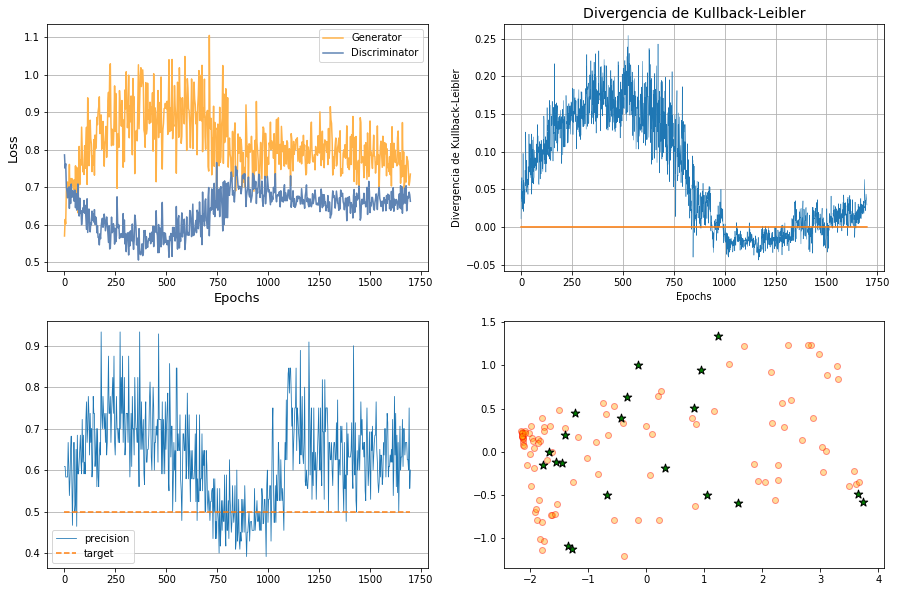

In [7]:
p = gan_utilities.plot_results(100)

In [8]:
def boxtplot_values(v):
    """
    parameters: 
        v: array with the values to make a boxplot
    return the values to plot a boxplot in the bokeh library
    return: [lower, quantile25, quantile50, quantile75, upper] and outliers
    """
    q25 = np.quantile(v, q=.25, interpolation="midpoint")
    q50 = np.quantile(v, q=.5, interpolation="midpoint")
    q75 = np.quantile(v, q=.75, interpolation="midpoint")
    lower = q25 - 1.5*(q75-q25)
    upper = q75 + 1.5*(q75-q25)
    #outliers
    outliers = v[(v<lower)|(v>upper)]

    return [lower, q25, q50, q75, upper], outliers

In [10]:
p_d, kld, l_g, l_d = gan_utilities.get_metrics(num_iter=300)

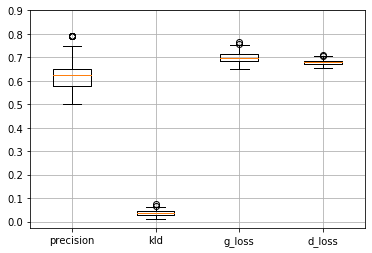

In [15]:
plt.boxplot([p_d, kld, l_g, l_d]);
#plt.yscale("logit")
plt.grid(axis="both");
plt.xticks(ticks=[1,2,3,4], labels=["precision", "kld", "g_loss", "d_loss"]);
plt.yticks(ticks=np.arange(0,1,.1), labels=np.round(np.arange(0,1.1,.1), 2));